# Pycaret regression

- https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb

- https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Intermediate%20-%20REG102.ipynb

## Setup libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

In [3]:
random_state = 786

In [4]:
from pycaret import regression as reg

In [69]:
from pycaret.utils import check_metric

In [5]:
from pycaret.datasets import get_data

## Get data

In [6]:
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [7]:
dataset.shape

(6000, 8)

In [8]:
dataset.dtypes.value_counts()

object     6
float64    1
int64      1
dtype: int64

Split data into training data and unseen data for predictions

In [9]:
data = dataset.sample(frac=0.9, random_state = random_state)
data_unseen = dataset.drop(data.index)

In [10]:
f'training data: {data.shape}, prediction data: {data_unseen.shape}'

'training data: (5400, 8), prediction data: (600, 8)'

## Setup pycaret

In [39]:
exp_reg1 = reg.setup(data=data, target='Price', session_id=1,
                     silent=True, verbose=False)

Display models

In [40]:
reg.models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


## Train models

In [38]:
reg.compare_models(fold=2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,784.7684,2845918.4783,1684.6939,0.9726,0.0802,0.0592,2.9150
et,Extra Trees Regressor,822.3515,3438296.9392,1852.6626,0.9670,0.0863,0.0636,0.3000
gbr,Gradient Boosting Regressor,961.1828,3706978.6876,1924.5037,0.9644,0.1070,0.0808,0.0850
rf,Random Forest Regressor,844.0056,3719851.6818,1927.1235,0.9643,0.0879,0.0634,0.3550
lightgbm,Light Gradient Boosting Machine,875.5905,3913796.8272,1978.2357,0.9624,0.0881,0.0638,0.0450
dt,Decision Tree Regressor,1104.0932,6278546.7221,2501.8293,0.9396,0.1190,0.0849,0.0150
ridge,Ridge Regression,2510.5747,15024372.8903,3875.5541,0.8558,0.6468,0.2995,0.0100
llar,Lasso Least Angle Regression,2464.1477,15118747.8487,3888.2280,0.8548,0.6588,0.2877,0.0150
lasso,Lasso Regression,2507.7848,15133841.0724,3890.1915,0.8547,0.6600,0.2985,0.0150
lr,Linear Regression,2510.0621,15139038.5164,3890.8870,0.8546,0.6499,0.2991,0.0100


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=1, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='auto',
             validate_parameters=1, verbosity=0)

## Create selected models

In [41]:
lightgbm = reg.create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,819.7131,5226390.2203,2286.1300,0.9587,0.0759,0.0557
1,726.7474,1813142.5767,1346.5298,0.9805,0.0862,0.0603
2,678.8696,1606613.9362,1267.5228,0.9826,0.0704,0.0533
3,749.9280,2026524.5136,1423.5605,0.9793,0.0776,0.0592
4,758.4384,3087541.8524,1757.1402,0.9697,0.0764,0.0534
5,798.8683,3414721.8222,1847.8966,0.9664,0.0798,0.0552
6,814.6627,2813097.8239,1677.2292,0.9759,0.0778,0.0581
7,640.4804,1729378.4640,1315.0584,0.9834,0.0671,0.0510
8,795.6116,5712935.2728,2390.1747,0.9504,0.0804,0.0556
9,726.5343,2457014.6766,1567.4867,0.9729,0.0784,0.0577


In [42]:
dt = reg.create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1180.2588,7515806.6978,2741.4972,0.9407,0.1140,0.0836
1,877.1209,2601959.1639,1613.0589,0.9720,0.1024,0.0741
2,926.3010,3620165.9118,1902.6734,0.9608,0.1066,0.0752
3,1103.5024,4394142.9132,2096.2211,0.9550,0.1124,0.0832
4,907.2028,3698851.9817,1923.2400,0.9637,0.1076,0.0734
5,872.6578,2256264.8075,1502.0868,0.9778,0.1007,0.0752
6,1120.1969,4926813.7531,2219.6427,0.9577,0.1201,0.0851
7,1085.3404,8854864.3025,2975.7124,0.9152,0.1100,0.0792
8,880.7451,3511094.0326,1873.7914,0.9695,0.0978,0.0735
9,971.1127,6504720.6301,2550.4354,0.9284,0.1012,0.0726


In [48]:
ridge = reg.create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2564.5523,23712404.8274,4869.5385,0.8128,0.6053,0.2853
1,2364.2795,10635652.8935,3261.2349,0.8855,0.5785,0.3080
2,2341.1413,11493577.0903,3390.2179,0.8755,0.5823,0.2899
3,2598.1472,12530128.7799,3539.7922,0.8718,0.6870,0.3210
4,2549.5950,14013642.4637,3743.4800,0.8627,0.6154,0.2932
5,2575.0472,15986891.8037,3998.3611,0.8429,0.7697,0.3021
6,2585.2975,15759587.9084,3969.8347,0.8648,0.5988,0.3064
7,2321.2792,13135988.2659,3624.3604,0.8741,0.5808,0.2692
8,2691.0154,19178598.7591,4379.3377,0.8336,0.7628,0.3230
9,2388.9613,12870198.4658,3587.5059,0.8583,0.6297,0.2818


## Tune models

In [45]:
tuned_lightgbm = reg.tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,883.7661,4116194.2430,2028.8406,0.9675,0.0946,0.0658
1,791.2449,1992894.8305,1411.6993,0.9785,0.0930,0.0656
2,748.9464,1696934.8990,1302.6645,0.9816,0.0895,0.0650
3,824.7931,1897146.9364,1377.3696,0.9806,0.1019,0.0720
4,846.7398,3287837.7731,1813.2396,0.9678,0.0931,0.0659
5,868.9575,2983141.5705,1727.1773,0.9707,0.0879,0.0677
6,825.9926,2316757.4640,1522.0898,0.9801,0.0825,0.0646
7,770.7400,1657084.0263,1287.2778,0.9841,0.0880,0.0668
8,819.3008,3582224.0383,1892.6764,0.9689,0.0892,0.0664
9,781.3500,1690087.5325,1300.0337,0.9814,0.0952,0.0715


In [46]:
tuned_dt = reg.tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1040.7156,7264356.1792,2695.2470,0.9427,0.1011,0.0710
1,909.9881,3104372.5800,1761.9230,0.9666,0.1046,0.0731
2,944.2302,2877343.2553,1696.2733,0.9688,0.1078,0.0762
3,1113.0172,4957736.8075,2226.5976,0.9493,0.1161,0.0839
4,1132.1601,8698242.7493,2949.2783,0.9148,0.1094,0.0739
5,941.0476,3162128.9749,1778.2376,0.9689,0.1012,0.0761
6,981.0317,3958984.9405,1989.7198,0.9660,0.0997,0.0725
7,862.8611,2520264.9041,1587.5342,0.9759,0.0974,0.0714
8,951.1442,4280902.3089,2069.0341,0.9629,0.1057,0.0759
9,872.1857,2965944.8833,1722.1919,0.9673,0.1071,0.0762


In [49]:
tuned_ridge = reg.tune_model(ridge)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2562.6819,23713324.3295,4869.6329,0.8128,0.6061,0.2849
1,2362.6380,10628359.4900,3260.1165,0.8855,0.5787,0.3077
2,2339.6941,11494655.5105,3390.3769,0.8755,0.5822,0.2895
3,2597.0127,12525914.5673,3539.1969,0.8718,0.6794,0.3208
4,2568.0736,14556484.2071,3815.2961,0.8573,0.6254,0.2934
5,2573.2211,15981363.8065,3997.6698,0.8429,0.7664,0.3017
6,2583.7097,15755836.2047,3969.3622,0.8649,0.5941,0.3061
7,2320.8443,13144471.9847,3625.5306,0.8741,0.5826,0.2690
8,2685.1756,18573920.8149,4309.7472,0.8388,0.7547,0.3230
9,2387.7019,12871131.8894,3587.6360,0.8583,0.6283,0.2815


## Plot models

### Residuals plot

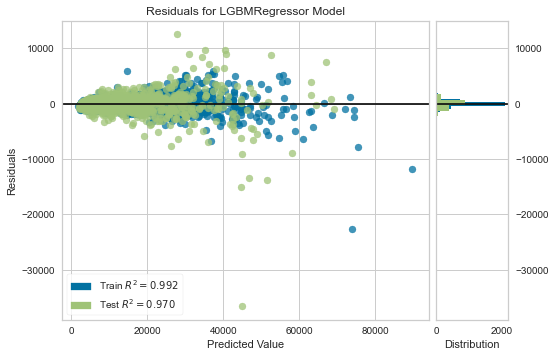

In [52]:
reg.plot_model(tuned_lightgbm, plot='residuals')

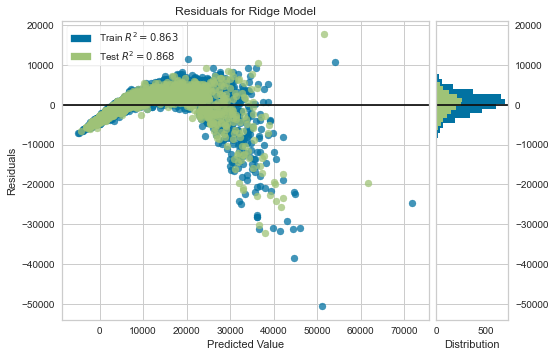

In [53]:
reg.plot_model(tuned_ridge, plot='residuals')

### Error plot

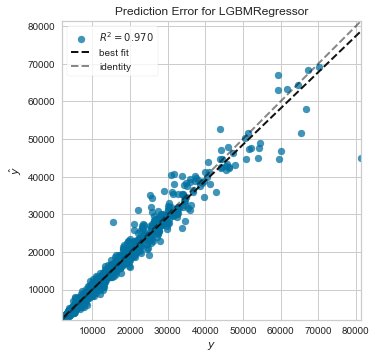

In [55]:
reg.plot_model(tuned_lightgbm, plot='error')

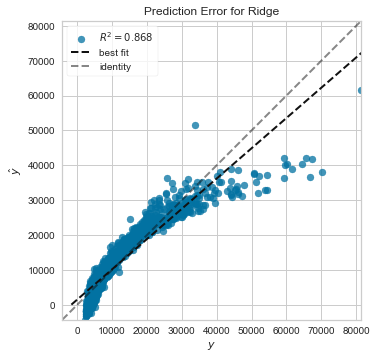

In [56]:
reg.plot_model(tuned_ridge, plot='error')

## Predict on hold-out sample

In [61]:
_ = reg.predict_model(tuned_lightgbm, verbose=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,799.5301,3072145.2126,1752.7536,0.9701,0.0897,0.0659


## Finalize model

In [62]:
final_lightgbm = reg.finalize_model(tuned_lightgbm)

In [64]:
final_lightgbm

LGBMRegressor(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
              importance_type='split', learning_rate=0.3, max_depth=-1,
              min_child_samples=26, min_child_weight=0.001, min_split_gain=0.8,
              n_estimators=230, n_jobs=-1, num_leaves=100, objective=None,
              random_state=1, reg_alpha=0.005, reg_lambda=4, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Predict on unseen data

In [67]:
unseen_predictions = reg.predict_model(final_lightgbm, data=data_unseen, verbose=True)

In [75]:
check_metric(unseen_predictions.Price, unseen_predictions.Label, metric='R2')

0.9791

## Save the model

In [77]:
model_file = 'diamond_final_lightgbm_2022-01-08.pkl'
reg.save_model(final_lightgbm, model_file)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy=...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.5,
                                importance_type='split', learning_rate=0.3,
                                max_depth=-1, min_child_samples=26,
                    

## Use the saved model

In [78]:
saved_final_lightgbm = reg.load_model(model_file)

Transformation Pipeline and Model Successfully Loaded


In [80]:
new_prediction = reg.predict_model(saved_final_lightgbm, data=data_unseen)

In [81]:
check_metric(new_prediction.Price, new_prediction.Label, 'R2')

0.9791